**6.1** Show that the determinant of the Vandermonde matrix from Eq.(6.17) obeys:

$det(X) = \prod_{i>j}(x_i − x_j) $

The easiest way to show this is via induction. Our result shows that if $x_i$ , $x_j$ for all
pairs then the determinant is non-zero, and therefore the matrix is non-singular.

Si partimos de la matriz de Vardemonde:

$
\begin{pmatrix}
1 & x_0 & x_0^2 & \cdot \cdot \cdot & x_0^{n-1}\\
1 & x_1 & x_1^2 & \cdot \cdot \cdot & x_1^{n-1}\\
1 & x_2 & x_2^2 & \cdot \cdot \cdot & x_2^{n-1}\\
\cdot & \cdot \cdot \cdot \cdot & \cdot \cdot \cdot  & \cdot  \cdot \cdot & \cdot  \cdot \cdot \\
1 & x_{n-1} & x_{n-1}^2 &  \cdot \cdot \cdot  & x_{n-1}^{n-1}
\end{pmatrix}
$

Iniciemos con el caso de la matriz de 2x2

$
\begin{pmatrix}
1 & x_0 \\
1 & x_1 \\
\end{pmatrix}
$

Naturalmente podemos notar que el determinante de la matriz es:
$det(V)=(x_1-x_0) $

Ahora si tuvieramos la matriz de 3x3

$
\begin{pmatrix}
1 & x_0 & x_0^2\\
1 & x_1 & x_1^2\\
1 & x_2 & x_2^2
\end{pmatrix}
$
Aqui el determinante lo podemos ver como:

$det(V)=-(x_1\cdot x_0^2)-(x_2\cdot x_1^2)-(x_2^2\cdot x_0)+(x_1 \cdot x_2^2)+(x_1^2\cdot x_0)+(x_2\cdot x_0^2) $

$=(x_2-x_0)(x_2 \cdot x_1-x_2 \cdot x_0-x_1^2+x_1 \cdot x_0)$

$=(x_2-x_0)(x_2-x_1)(x_1-x_0)$

Y asi podriamos seguir para las matrices mas grandes, este resultado lo podemos generalizar como:
$
\begin{pmatrix}
1 & x_0 & x_0^2 & \cdot \cdot \cdot & x_0^{n-1}\\
1 & x_1 & x_1^2 & \cdot \cdot \cdot & x_1^{n-1}\\
1 & x_2 & x_2^2 & \cdot \cdot \cdot & x_2^{n-1}\\
\cdot & \cdot \cdot \cdot \cdot & \cdot \cdot \cdot  & \cdot  \cdot \cdot & \cdot  \cdot \cdot \\
1 & x_{n-1} & x_{n-1}^2 &  \cdot \cdot \cdot  & x_{n-1}^{n-1}
\end{pmatrix}
$
$ det(V)=(x_1\cdot x_2^2 \cdot \cdot \cdot x_{n-1}^{n-1})+(x_0 \cdot x_1^2 \cdot \cdot \cdot 1)+ \cdot \cdot \cdot - (x_0^{n-1} \cdot \cdot \cdot 1)-(1\cdot x_1^{n-1} \cdot \cdot \cdot x_{n-1})- \cdot \cdot \cdot$

$=(x_n-x_{n-1})(x_n-x_{n-2}) \cdot\cdot\cdot(x_2-x_1)(x_2-x_0)(x_1-x_0)=\prod_{i>j}(x_i-x_j) $



**6.4** Build intuition on equispaced vs Chebyshev nodes by plotting the cardinal polynomials for n = 10. What do you observe regarding their magnitude?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from math import sqrt
from scipy.special import factorial
from sympy import integrate, init_printing
init_printing(use_latex="mathjax")
from scipy.special import kv
import cmath
from math import sqrt, pi, factorial, exp

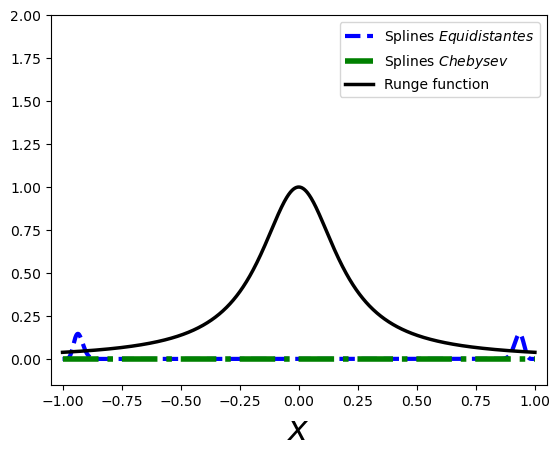

In [8]:
def f(x):
      return 1/(1 + 25*x**2)

def generatedata(n,f,nodes="cheb"): 
    if nodes=="cheb":
        dataxs = -np.cos(np.linspace(0,np.pi,n)) 
    else:
        dataxs = np.linspace(-1,1,n)
    datays = f(dataxs)
    return dataxs, datays

def weights(dataxs):
      n = dataxs.size
      ws = np.ones(n)
      for k in range(n):
           for j in range(n):
                if j == k:
                    continue
                ws[k] *= (dataxs[k]-dataxs[j])
      return 1/ws

def numerador(x,dataxs):
    n=len(dataxs)
    nume=np.ones(n)
    for k in range(n):
        for j in range(n):
            if j==k:
                continue
            nume[k]*=(x-dataxs[j])
    return nume

def lk(x,dataxs,datays,n):
    nume=numerador(x,dataxs)
    w=weights(dataxs)
    l=np.ones(n-1)
    lk=1
    c=np.multiply(w, nume)
    for i in range(n):
            lk*=c[i]
    return lk

def pol(x,dataxs,datays):
    lag=list(map(lambda x,y,z:x*y*z,numerador(x,dataxs),weights(dataxs),datays))
    suma=sum(lag)
    return suma
    
def plotting():
    plt.xlabel('$x$', fontsize=24)

    n = 10
    dataxs, datays = generatedata(n, f, "equi")
    interpxsA = np.linspace(-1,1,100*n)
    interpysA = [lk(x,dataxs, datays,n) for x in interpxsA] 
    plt.plot(interpxsA, interpysA, 'b--', label='Splines $Equidistantes$', linewidth=3)

    n = 10
    dataxs, datays = generatedata(n, f, "cheb")
    interpxsB = np.linspace(-1,1,100*n)
    interpysB = [lk(x,dataxs, datays, n) for x in interpxsB] 
    plt.plot(interpxsB, interpysB, 'g-.', label='Splines $Chebysev$', linewidth=4)
    plt.plot(interpxsB, f(interpxsB), 'k-', label='Runge function', linewidth=2.5)
    
    plt.legend(loc=1)

    plt.xlim(-1.05, 1.05)
    plt.ylim(-0.15, 2)
    plt.show()

if __name__ == '__main__':
    plotting()



In [3]:
n = 10
dataxs, datays = generatedata(n, f, "cheb")
x= numerador(0.5,dataxs)
d=weights(dataxs)
print(x,d)
lk(-0.99,dataxs,datays,n)

[-3.90312782e-18 -4.06662620e-18 -4.62439669e-18 -5.85469173e-18
 -8.69102289e-18 -1.79398163e-17 -3.51562500e-02  2.20064425e-17
  1.33154196e-17  1.17093835e-17] [-14.22222222  28.44444444 -28.44444444  28.44444444 -28.44444444
  28.44444444 -28.44444444  28.44444444 -28.44444444  14.22222222]


2.7144353975945736e-16

**6.7** We know from Eq. (6.38) that the error of the interpolant at the point x is proportional to the node polynomial value Eq. (6.24) at that point. In problem 6.8 we formally show that Chebyshev nodes minimize the maximum value of the node polynomial. Here you should plot L(x) for n = 7 and n = 15 for the two choices of equidistant and Chebyshev nodes and draw the corresponding conclusions.

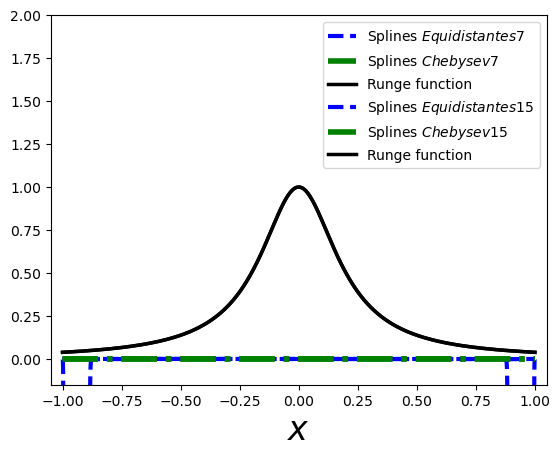

In [4]:
def plotting2():
    plt.xlabel('$x$', fontsize=24)

    n = 7
    dataxs, datays = generatedata(n, f, "equi")
    interpxsA = np.linspace(-1,1,100*n)
    interpysA = [lk(x,dataxs, datays,n) for x in interpxsA] 
    plt.plot(interpxsA, interpysA, 'b--', label='Splines $Equidistantes 7$', linewidth=3)

    n = 7
    dataxs, datays = generatedata(n, f, "cheb")
    interpxsB = np.linspace(-1,1,100*n)
    interpysB = [lk(x,dataxs, datays, n) for x in interpxsB] 
    plt.plot(interpxsB, interpysB, 'g-.', label='Splines $Chebysev 7$', linewidth=4)
    plt.plot(interpxsB, f(interpxsB), 'k-', label='Runge function', linewidth=2.5)

    n = 15
    dataxs, datays = generatedata(n, f, "equi")
    interpxsA = np.linspace(-1,1,100*n)
    interpysA = [lk(x,dataxs, datays,n) for x in interpxsA] 
    plt.plot(interpxsA, interpysA, 'b--', label='Splines $Equidistantes 15$', linewidth=3)

    n = 15
    dataxs, datays = generatedata(n, f, "cheb")
    interpxsB = np.linspace(-1,1,100*n)
    interpysB = [lk(x,dataxs, datays, n) for x in interpxsB] 
    plt.plot(interpxsB, interpysB, 'g-.', label='Splines $Chebysev 15$', linewidth=4)
    plt.plot(interpxsB, f(interpxsB), 'k-', label='Runge function', linewidth=2.5)




    
    plt.legend(loc=1)

    plt.xlim(-1.05, 1.05)
    plt.ylim(-0.15, 2)
    plt.show()

if __name__ == '__main__':
    plotting2()

**6.10** Following techniques similar to those used in section 6.2.2.4, you should derive the general error formula for Hermite interpolation, Eq. (6.50). Specifically, you should start in the spirit of Eq. (6.33) and define:

$F(x)=f(x)-p(x)-K\prod_{j=0}^{n-1}(x-x_j)^2$

And then follow the rest of the derivation

Partiremos de la ecuación:

$F(x)=f(x)-p(x)-L(x)K$

Pero por la simetría que presentan los polinomios de Hermite, podemos definirla de la siguiente forma:

$F(x)=f(x)-p(x)-K\prod_{j=0}^{n-1}(x-x_j)^2$

Como los polinomios de Hermite nos ayudaran a representar polinomios de grado 2n-1, si nosotros derivamos 2n veces el polinomio p(x)
$\Rightarrow p^{2n}(x)=0$ y si consideramos que la función tiene ceros en $\xi$ tenemos que $F(\xi)=0$, además si derivamos 2n veces los polinomios cardinales $L^{2n}(x)=(2n)!$. Si reescribimos la primera ecuación con estas consideraciones, obtenemos:

$F^{2n}(\xi)=f^{2n}(\xi)-p^{2n}(\xi)-L^{2n}(xi)K$

$0=f^{2n}(\xi)-0-(2n)!K$

$K=\cfrac{f^{2n}(\xi)}{(2n)!}$

Con este nuevo valor de $K$ podemos reescribir la segunda ecuación que definimos.

$F(x)=f(x)-p(x)-\cfrac{f^{2n}(\xi)}{(2n)!} \prod_{j=0}^{n-1}(x-x_j)^2$

Si ahora consideramos que en los nodos $F(x^*)=0$

$F(x^*)=f(x^*)-p(x^*)-\cfrac{f^{2n}(\xi)}{(2n)!} \prod_{j=0}^{n-1}(x^*-x_j)^2$

$0=f(x^*)-p(x^*)-\cfrac{f^{2n}(\xi)}{(2n)!} \prod_{j=0}^{n-1}(x^*-x_j)^2$

$f(x^*)=p(x^*)+\cfrac{f^{2n}(\xi)}{(2n)!} \prod_{j=0}^{n-1}(x^*-x_j)^2$

Que es la función de error para los polinomios de Hermite


**6.13** The method of piecewise-linear interpolation is essentially an application of Lagrange interpolation in each panel, this time not to the second derivative, as in Eq. (6.67), but to the function itself. Specifically, we have:

$sk_{−1,k}(x) = y_{k−1} \cfrac{x_k − x}{x_k − x_{k−1}} + yk \cfrac{x − x_{k−1}}{x_k − x_{k−1}}  $

where this is to be interpreted as in Eq. (6.51). A moment’s attention will highlight that this expression is nothing but Eq. (6.70) where we have dropped all the c terms Implement this in Python for Runge’s function, for n = 15 and n = 150.


0.3 0.2592750581841138 0.3076923076923077


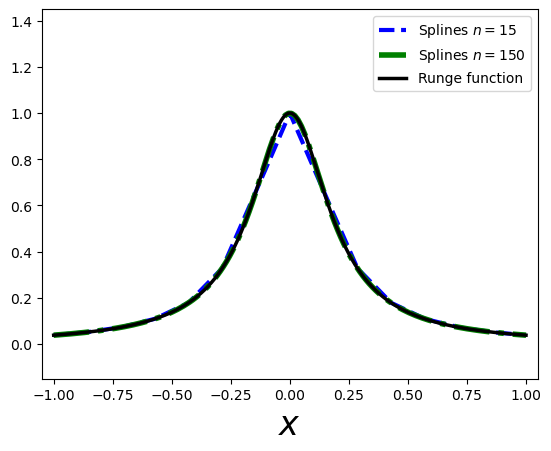

In [4]:
from math import sqrt, pi
def f(x):
    return 1/(1 + 25*x**2)

def generatedata(n,f,nodes="cheb"):
    if nodes=="cheb":
        dataxs = -np.cos(np.linspace(0,np.pi,n))
    else:
        dataxs = np.linspace(-1,1,n)
    datays = f(dataxs)
    return dataxs, datays

def weights(dataxs):
    n = dataxs.size
    ws = np.ones(n)
    for k in range(n):
        for j in range(n):
            if j == k:
                continue
            ws[k] *= (dataxs[k]-dataxs[j])
    return 1/ws

def bary(dataxs,datays,ws,x):
    k = np.where(x == dataxs)[0]
    if k.size == 0:
        nume = np.sum(ws*datays/(x-dataxs))
        denom = np.sum(ws/(x-dataxs))
        val = nume/denom
    else:
        val = datays[k[0]]
    return val

if __name__ == '__main__':
    dataxs, datays = generatedata(15, f)
    ws = weights(dataxs)
    x = 0.3; pofx = bary(dataxs, datays, ws, x)
    print(x, pofx, f(x))

def linsplin(dataxs,datays,x):
    k = np.argmax(dataxs>x)
    xk = dataxs[k]; xk1 = dataxs[k-1]
    yk = datays[k]; yk1 = datays[k-1]

    val = yk1*(xk-x)/(xk-xk1) + yk*(x-xk1)/(xk-xk1)
    return val

def plotting():
    plt.xlabel('$x$', fontsize=24)

    n = 15
    dataxs, datays = generatedata(n, f, "equi")
    interpxsA = np.linspace(-1,1,100*n)
    interpysA = [linsplin(dataxs, datays, x) for x in interpxsA] 
    plt.plot(interpxsA, interpysA, 'b--', label='Splines $n=15$', linewidth=3)

    n = 150
    dataxs, datays = generatedata(n, f, "equi")
    interpxsB = np.linspace(-1,1,100*n)
    interpysB = [linsplin(dataxs, datays, x) for x in interpxsB] 
    plt.plot(interpxsB, interpysB, 'g-.', label='Splines $n=150$', linewidth=4)

    plt.plot(interpxsB, f(interpxsB), 'k-', label='Runge function', linewidth=2.5)

    plt.legend(loc=1)

    plt.xlim(-1.05, 1.05)
    plt.ylim(-0.15, 1.45)
    plt.show()

if __name__ == '__main__':
    plotting()

**6.16** Derive Eq. (6.70); you may choose to employ a symbolic algebra package to help with the manipulations. While you’re at it, also check for the continuity of the second derivative, Eq. (6.65), for Eq. (6.70).

**6.22** Produce plots like in Fig. 6.9, this time for $f (x) = e^{sin x+cos x}$ using $n = 6$ and $n = 8$.

In [2]:
from math import pi
import numpy as np
def fun(x):
    return np.exp(np.sin(2*x))

def generatedatan(n,fun):
    dataxs = 2*pi*np.arange(n)/n
    datays = fun(dataxs)
    return dataxs, datays

def computeparams(dataxs,datays): 
    n = dataxs.size
    m = n//2
    aparams = np.zeros(m+1)
    bparams = np.zeros(m-1)
    for k in range(m+1):
        aparams[k] = datays@np.cos(k*dataxs)/m
        for k in range(1,m):
            bparams[k-1] = datays@np.sin(k*dataxs)/m
    return aparams, bparams

def triginterp(aparams,bparams,x):
    n = aparams.size + bparams.size
    m = n//2
    val = 0.5*(aparams[0] + aparams[-1]*np.cos(m*x)) 
    for k in range(1,m):
        val += aparams[k]*np.cos(k*x)
        val += bparams[k-1]*np.sin(k*x)
    return val

if __name__=='main':
    dataxs, datays = generatedatan(6, fun)
    aparams, bparams = computeparams(dataxs, datays) 
    x = 0.3; pofx = triginterp(aparams, bparams, x) 
    print(x,pofx)


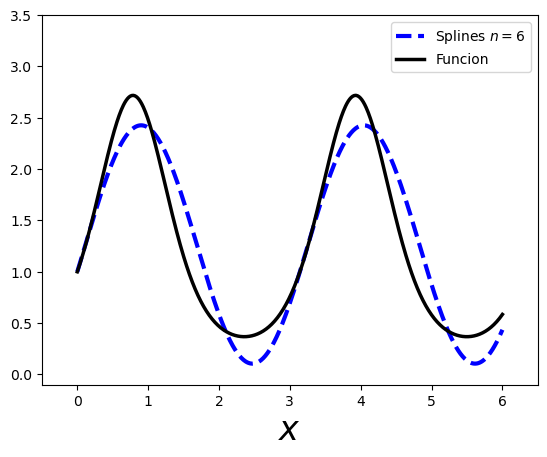

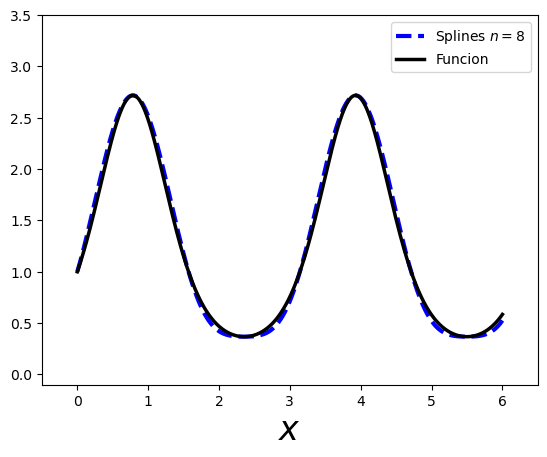

In [12]:
def plottingtrig():
    plt.xlabel('$x$', fontsize=24)

    n = 6
    dataxs, datays = generatedatan(n, fun)
    interpxsA = np.linspace(0,6,100*n)
    aparams, bparams = computeparams(dataxs, datays) 
    pofx = triginterp(aparams, bparams, interpxsA) 
    plt.plot(interpxsA, pofx,'b--', label='Splines $n=6$', linewidth=3)

    plt.plot(interpxsA, fun(interpxsA), 'k-', label='Funcion', linewidth=2.5)

    plt.legend(loc=1)

    plt.xlim(-0.5, 6.5)
    plt.ylim(-0.1, 3.5)
    plt.show()

if __name__ == '__main__':
    plottingtrig()


def plottingtrig1():
    plt.xlabel('$x$', fontsize=24)

    n = 8
    dataxs, datays = generatedatan(n, fun)
    interpxsA = np.linspace(0,6,100*n)
    aparams, bparams = computeparams(dataxs, datays) 
    pofx = triginterp(aparams, bparams, interpxsA) 
    plt.plot(interpxsA, pofx,'b--', label='Splines $n=8$', linewidth=3)

    plt.plot(interpxsA, fun(interpxsA), 'k-', label='Funcion', linewidth=2.5)

    plt.legend(loc=1)

    plt.xlim(-0.5, 6.5)
    plt.ylim(-0.1, 3.5)
    plt.show()

if __name__ == '__main__':
    plottingtrig1()